# Bewerten von Modellen: K-Nearest Neighbors Classifier für Iris Daten
[Video](https://mstream.hm.edu/paella/ui/watch.html?id=cdf8b73f-56a5-4598-9dae-e80bf63bfe8e)

## Verwenden eines Test-Sets

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

Lade Iris Daten und erzeuge daraus Feature Matrix sowie Labels Vektor:

In [ ]:
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

**Ziel:** Trainiere ein Modell mit den Iris-Daten, so dass es dann für gegebene Sepal- und Petal-Längen und Breiten die Spezies angeben kann.

Um zu überprüfen, ob das resultierende Modell korrekt klassifiziert, entfernen wir vor dem Training einen Teil des Datensatzes. Dieser kann dann anschließend zum Testen verwendet werden.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, train_size = 0.7)

Wir verwenden nun **NUR** die ``_train`` Daten, um ein Modell zu trainieren.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Nun ist das Modell trainiert. Es hat die ``_test`` Daten **NOCH NIE** gesehen; diese sind somit aus Modellsicht neue, unbekannte Daten.

Auf diese Daten wenden wir nun das Modell an:

In [ ]:
y_model = model.predict(X_test)

## Bewerten des Modells

Nun vergleichen wir die vom Modell vorhergesagten Daten ``y_model`` mit den korrekten Daten ``y_test``. Die Funktion ``accuracy_score()`` gibt den Anteil der korrekten Klassifizierungen an.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.9333333333333333

**Vorsicht:** Die hier erhaltene Genauigkeit hängt natürlich von der Wahl des Testsets ab - anderes Testset $\Longrightarrow$ andere Genauigkeit.

Natürlich können wir die Ergebnisse auch direkt betrachten und vergleichen:

In [ ]:
y_model

array(['versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'setosa'],
      dtype=object)

In [ ]:
y_test.head()

74     versicolor
138     virginica
24         setosa
81     versicolor
22         setosa
Name: species, dtype: object

``y_test`` behält die Indizes der original Iris Daten bei. Das erlaubt es uns, die vom Modell vorhergesagten Daten in die Iris Daten zu integrieren:

Dafür brauchen wir zuerst ein Objekt, welches mit solchen Indizes umgehen kann, eine ``pd.Series``. Diese füllen wir mit den Ergebnissen aus ``y_model`` und indizieren sie mit den Indizes aus ``y_test``.

In [ ]:
import pandas as pd

In [ ]:
y_model = pd.Series(y_model, index= y_test.index)
y_model

74     versicolor
138     virginica
24         setosa
81     versicolor
22         setosa
79     versicolor
69     versicolor
72      virginica
106    versicolor
105     virginica
68     versicolor
143     virginica
89     versicolor
29         setosa
16         setosa
90     versicolor
0          setosa
58     versicolor
65     versicolor
148     virginica
8          setosa
100     virginica
41         setosa
129     virginica
67     versicolor
92     versicolor
77     versicolor
73     versicolor
123     virginica
135     virginica
61     versicolor
60     versicolor
134     virginica
94     versicolor
46         setosa
93     versicolor
114     virginica
20         setosa
101     virginica
70      virginica
51     versicolor
102     virginica
42         setosa
19         setosa
27         setosa
dtype: object

Diese um den passenden Index ergänzten ``y_model`` Daten können wir nun dem Iris DataFrame hinzufügen. In ``KN_species`` nicht enthaltene Daten sollen leer bleiben. Wir betrachten nur den Teil des DataFrame, in dem ``KN_species`` Einträge hat.

In [ ]:
iris['KN_species'] = y_model
iris = iris.fillna(value = {'KN_species':''})
iris[iris.KN_species!='']

,sepal_length,sepal_width,petal_length,petal_width,species,KN_species
0,5.1,3.5,1.4,0.2,setosa,setosa
8,4.4,2.9,1.4,0.2,setosa,setosa
16,5.4,3.9,1.3,0.4,setosa,setosa
19,5.1,3.8,1.5,0.3,setosa,setosa
20,5.4,3.4,1.7,0.2,setosa,setosa
22,4.6,3.6,1.0,0.2,setosa,setosa
24,4.8,3.4,1.9,0.2,setosa,setosa
27,5.2,3.5,1.5,0.2,setosa,setosa
29,4.7,3.2,1.6,0.2,setosa,setosa
41,4.5,2.3,1.3,0.3,setosa,setosa


Wir betrachten nur den Teil des DataFrame, in dem ``species`` und ``KN_species`` verschieden sind, d.h. die falsch klassifizierten Samples.

In [ ]:
iris.loc[iris.KN_species!=''].loc[iris.KN_species != iris.species]

,sepal_length,sepal_width,petal_length,petal_width,species,KN_species
70,5.9,3.2,4.8,1.8,versicolor,virginica
72,6.3,2.5,4.9,1.5,versicolor,virginica
106,4.9,2.5,4.5,1.7,virginica,versicolor


Nun führen wir eine Hilfsvariable ``species_tmp`` ein, welche die einfache grafische Markierung derjenigen Samples ermöglicht, die falsch klassifiziert wurden.

Diese soll bei korrekter Klassifizierung die Spezies angeben, bei falscher Klassifizierung den Wert ``wrong``.

In [ ]:
iris.loc[(iris.KN_species!='') & (iris.KN_species!=iris.species), 'species_tmp'] = 'wrong'
iris.loc[(iris.KN_species!='') & (iris.KN_species==iris.species), 'species_tmp'] = iris.species
iris.loc[(iris.KN_species==''), 'species_tmp'] = iris.species

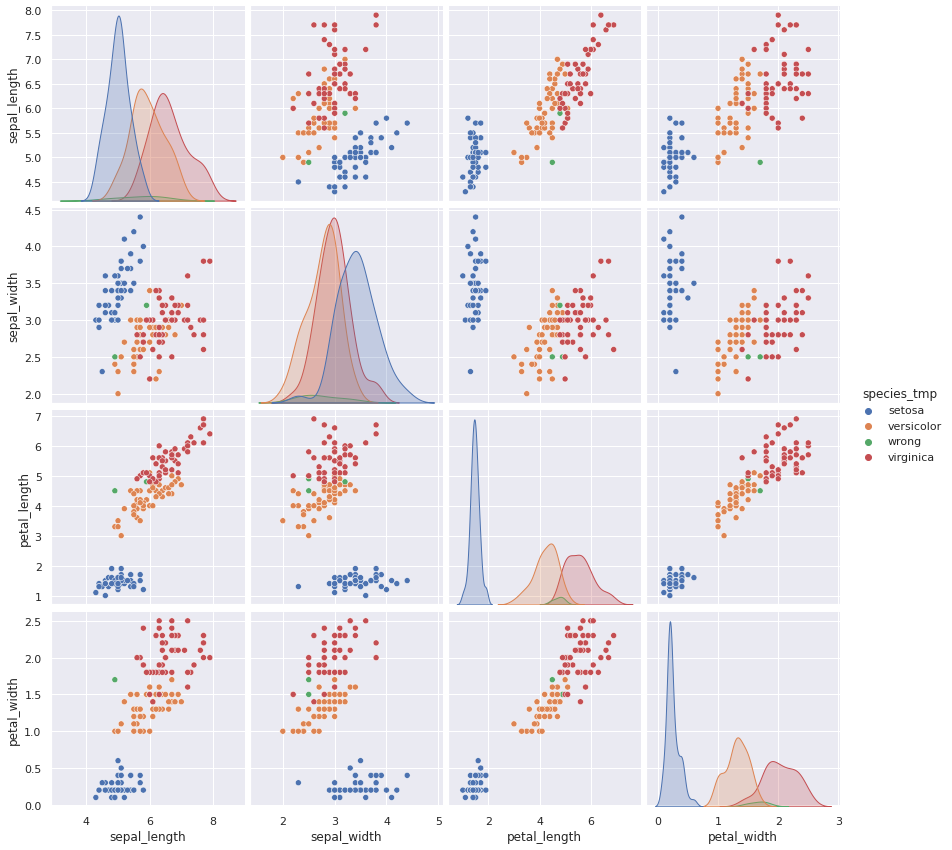

In [ ]:
sns.pairplot(iris, hue='species_tmp', height = 3)

## Cross Validation

### Einfachster Fall: Manuelle Aufteilung in zwei Durchgänge
Wir teilen die Trainingsdaten gleichmäßig in zwei Teile auf:

####Code für die Visualisierung der Aufteilung

In [ ]:
def draw_rects(N, ax, textprop={}):
    for i in range(N):
        ax.add_patch(plt.Rectangle((0, i), 5, 0.7, fc='white', edgecolor='black'))
        ax.add_patch(plt.Rectangle((5. * i / N, i), 5. / N, 0.7, fc='lightgray', ec='black'))
        ax.text(5. * (i + 0.5) / N, i + 0.35,
                "validation\nset", ha='center', va='center', **textprop)
        ax.text(0, i + 0.35, "Durchgang {0}".format(N - i),
                ha='right', va='center', rotation=90, **textprop)
    ax.set_xlim(-1, 6)
    ax.set_ylim(-0.2, N + 0.2)

####Visualisierung der Aufteilung

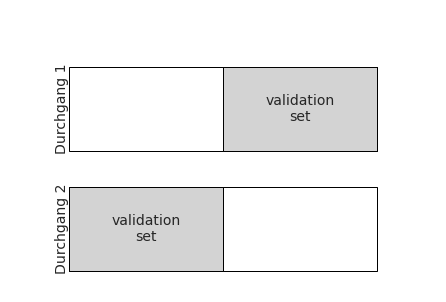

In [ ]:
X1, X2, y1, y2 = train_test_split(X_train, y_train, random_state=0, train_size=0.5)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
draw_rects(2, ax, textprop=dict(size=14))

#### Durchgang 1
Das Modell wird nun auf dem Set ``1`` gefittet...

In [ ]:
model.fit(X1,y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

...  und anschließend auf dem Set ``2`` bewertet:

In [ ]:
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9811320754716981

#### Durchgang 2
Das Modell wird nun auf dem Set ``2`` gefittet...

In [ ]:
model.fit(X2,y2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

... und anschließend auf dem Set ``1`` bewertet:

In [ ]:
y1_model = model.predict(X1)
accuracy_score(y1, y1_model)

0.9807692307692307

###Allgemeiner Fall: Automatische Aufteilung in beliebig viele Folds
Die oben manuell durchgeführte Aufteilung und das anschließende gegenseitige Trainieren und Testen kann automatisiert werden durch ``cross_val_score``. Dabei gibt der Parameter ``cv`` die Anzahl der sog. *Folds* an.

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=5)

array([1.        , 0.95238095, 0.95238095, 1.        , 0.95238095])

Der extremste Fall ist, dass es genauso viele Folds gibt wie Samples (im Trainingsset). D.h. Für jeden Durchgang wird genau ein Sample zur Validierung zurückgehalten.

In [ ]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X_train, y_train, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

Die Score ist jeweils entweder
- 0: d.h. das eine Validierungssample wurde falsch klassifiziert oder
- 1: d.h. das eine Validierungssample wurde korrekt klassifiziert.

Der Mittelwert ist ein gutes Maß dafür, wie gut das Modell ist:

In [ ]:
scores.mean()

0.9714285714285714